In [40]:
%matplotlib inline

import collections

import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import tqdm

# Summary of Riddler Express

You start with the integers from one to 100, inclusive, and you want to organize them into a chain. The only rules for building this chain are that you can only use each number once and that each number must be adjacent in the chain to one of its factors or multiples. For example, you might build the chain:

4, 12, 24, 6, 60, 30, 10, 100, 25, 5, 1, 97

You have no numbers left to place after 97, leaving you with a finished chain of length 12.

What is the longest chain you can build?

Extra credit: What if you started with more numbers, e.g., one through 1,000?

## computational solution

I think we can do this simply by building a network and finding the longest un-connected path

In [30]:
def generate_multiples(n=100):
    """yield all pairs of (i, a*i) where both i and a*i are less than n"""
    for i in range(1, n):
        val = i + i
        while val < n:
            yield i, val
            val += i

what about a very simple graph

In [31]:
list(generate_multiples(10))

[(1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 4),
 (2, 6),
 (2, 8),
 (3, 6),
 (3, 9),
 (4, 8)]

In [32]:
g10 = nx.Graph()
g10.add_edges_from(generate_multiples(n=10))

/Users/zach.lamberty/miniconda3/envs/bullshit/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/zach.lamberty/miniconda3/envs/bullshit/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/zach.lamberty/miniconda3/envs/bullshit/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/zach.lamberty/miniconda3/envs/bullshit/lib/python3.6/site-packages/matplotlib/rcsetup.py:15

{1: <matplotlib.text.Text at 0x11844c160>,
 2: <matplotlib.text.Text at 0x118468128>,
 3: <matplotlib.text.Text at 0x118468d30>,
 4: <matplotlib.text.Text at 0x118468fd0>,
 5: <matplotlib.text.Text at 0x118458b00>,
 6: <matplotlib.text.Text at 0x1184586d8>,
 7: <matplotlib.text.Text at 0x118458cf8>,
 8: <matplotlib.text.Text at 0x11843cc18>,
 9: <matplotlib.text.Text at 0x11843c390>}

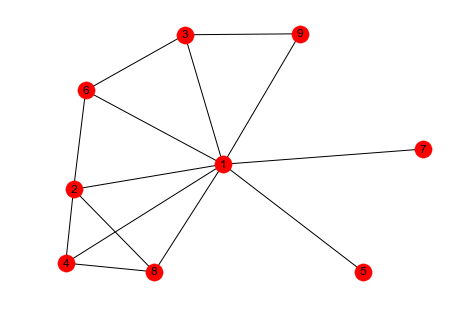

In [35]:
pos = nx.spring_layout(g10)
nx.draw(g10, pos)
nx.draw_networkx_labels(g10, pos)

longest path (From inspection) is 8 nodes: {7/5} > 1 > 9 > 3 > 6 > 2 > 4 > 8

In [47]:
g10.nodes()

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [91]:
def get_max_paths(g):
    nodes = sorted(g.nodes())
    n0 = min(nodes)
    n1 = max(nodes) + 1
    maxlen = 0
    maxpaths = set()
    for i in tqdm.tnrange(n0, n1):
        for j in tqdm.tnrange(i + 1, n1):
            for path in nx.all_simple_paths(g, i, j):
                l = len(path)
                if l == maxlen:
                    maxpaths.add(tuple(path))
                if l > maxlen:
                    maxlen = l
                    maxpaths = {tuple(path),}

    return maxlen, maxpaths

In [92]:
maxlen, maxpaths = get_max_paths(g10)
maxpaths

{(4, 8, 2, 6, 3, 9, 1, 5),
 (4, 8, 2, 6, 3, 9, 1, 7),
 (5, 1, 4, 8, 2, 6, 3, 9),
 (5, 1, 8, 4, 2, 6, 3, 9),
 (5, 1, 9, 3, 6, 2, 4, 8),
 (7, 1, 4, 8, 2, 6, 3, 9),
 (7, 1, 8, 4, 2, 6, 3, 9),
 (7, 1, 9, 3, 6, 2, 4, 8)}

In [93]:
g = nx.Graph()
g.add_edges_from(generate_multiples(n=100))

In [94]:
maxlen, maxpaths = get_max_paths(g)
maxpaths

4144482it [05:53, 11709.22it/s]

KeyboardInterrupt: 

/Users/zach.lamberty/miniconda3/envs/bullshit/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/zach.lamberty/miniconda3/envs/bullshit/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/zach.lamberty/miniconda3/envs/bullshit/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/zach.lamberty/miniconda3/envs/bullshit/lib/python3.6/site-packages/matplotlib/rcsetup.py:15

{1: <matplotlib.text.Text at 0x114916278>,
 2: <matplotlib.text.Text at 0x1149d9390>,
 3: <matplotlib.text.Text at 0x1149d9748>,
 4: <matplotlib.text.Text at 0x1149d9b00>,
 5: <matplotlib.text.Text at 0x1149d9eb8>,
 6: <matplotlib.text.Text at 0x1149e02b0>,
 7: <matplotlib.text.Text at 0x1149e0668>,
 8: <matplotlib.text.Text at 0x1149e0a20>,
 9: <matplotlib.text.Text at 0x1149e0dd8>,
 10: <matplotlib.text.Text at 0x1149ed1d0>,
 11: <matplotlib.text.Text at 0x1149ed4e0>,
 12: <matplotlib.text.Text at 0x1149ed898>,
 13: <matplotlib.text.Text at 0x1149edc50>,
 14: <matplotlib.text.Text at 0x1149f8048>,
 15: <matplotlib.text.Text at 0x1149f8400>,
 16: <matplotlib.text.Text at 0x1149f87b8>,
 17: <matplotlib.text.Text at 0x1149f8b70>,
 18: <matplotlib.text.Text at 0x1149f8f28>,
 19: <matplotlib.text.Text at 0x114a03320>,
 20: <matplotlib.text.Text at 0x114a036d8>,
 21: <matplotlib.text.Text at 0x114a03a90>,
 22: <matplotlib.text.Text at 0x114a03e48>,
 23: <matplotlib.text.Text at 0x114a0e240

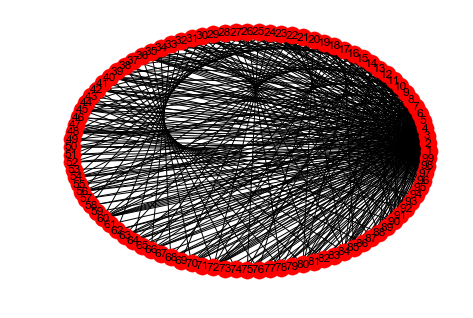

In [38]:
pos = nx.circular_layout(g)
nx.draw(g, pos)
nx.draw_networkx_labels(g, pos)

let's try a different approach...

In [39]:
def multiples_dict(n=100):
    d = collections.defaultdict(set)
    for (i, j) in generate_multiples(n=n):
        d[i].add(j)
        d[j].add(i)
    return d

In [42]:
d = multiples_dict(10)
d

defaultdict(set,
            {1: {2, 3, 4, 5, 6, 7, 8, 9},
             2: {1, 4, 6, 8},
             3: {1, 6, 9},
             4: {1, 2, 8},
             5: {1},
             6: {1, 2, 3},
             7: {1},
             8: {1, 2, 4},
             9: {1, 3}})

In [ ]:
for i0